## Prepare training sample data for object detection

### Introduction

Deep learning is a type of machine learning. It relies on multiple layers of nonlinear processing for feature identification and pattern recognition. ArcGIS uses deep learning frameworks to accomplish various deep learning analyses, including object detection. Object detection involves locating specific features within an image. Training a model to detect one object, or multiple objects, saves the time and expense of digitizing and collecting data. It also allows you to expand your analysis by using the model with different datasets and in different locations.

### Scenario
Tax assessors at local government agencies often rely on surveys to estimate property value and calculate property taxes. These surveys are infrequent, which means that there can be some inaccuracy in the assessment records. Swimming pools are an important part of these assessments because they impact the value of a property. You will use ArcGIS deep learning tools to detect all swimming pools in a defined area. Tax assessors can use this information to identify newly constructed pools that were not recorded in the assessment records. This information will help tax assessors identify more appropriate property values and taxes, which can lead to additional revenue for the community.


### **Download the exercise data files**

1. Open a new web browser tab or window.

2. Go to https://links.esri.com/Section05/DataOpens in new window and download the exercise data ZIP file.

>Note: The complete URL to the exercise data file is https://www.arcgis.com/home/item.html?id=f283da2e3fd04ef68ebe43ed08646a7cOpens in new window.

3. Extract the files to the EsriTraining folder on your local computer.

### **Open an ArcGIS Pro project**

1. Browse to the ObjectDetection folder that you saved on your computer.

2. Open the `ObjectDetection.aprx` project.

>Your ArcGIS Pro project includes an imagery file that shows a false-color image of an area in Southern California. This false-color image uses an infrared band to visualize vegetation in red. Although you can use a true-color image for this analysis, the false-color image better distinguishes pools from other objects.



### Create training samples

The first step in object detection is to prepare training data that will be used to train the model. There are various ways to prepare training samples:

- Use ArcGIS Pro editing tools
- Use the Label Objects For Deep Learning tool
- Use crowdsourced data (for example, community-based damage assessments)
- Use preexisting data as training samples (for example, a feature class of building footprints)

In this step, you will prepare training samples by using the Label Objects For Deep Learning tool.

1. In the Contents pane, select NAIP_AOI.tif.

2. From the Imagery tab, in the Image Classification group, click Classification Tools and choose Label Objects For Deep Learning.

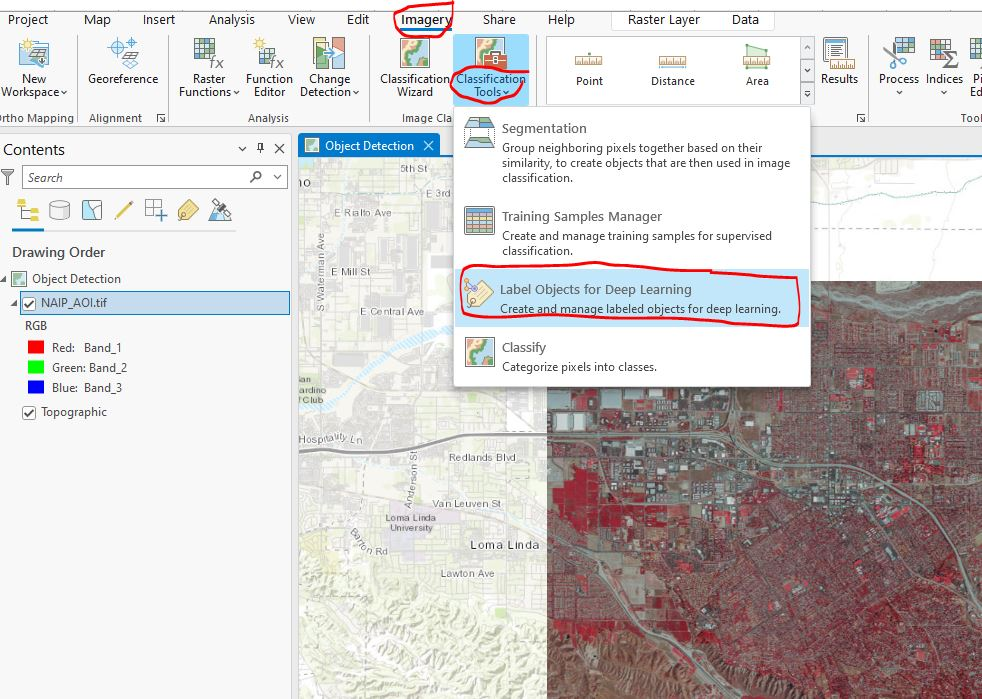

The Image Classification pane provides tools for you to trace, or digitize, the features that you will use as your training samples.

3. In the Image Classification pane, if necessary, click the Polygon tool .

4. From the Map tab, zoom to the Pool 1 bookmark.

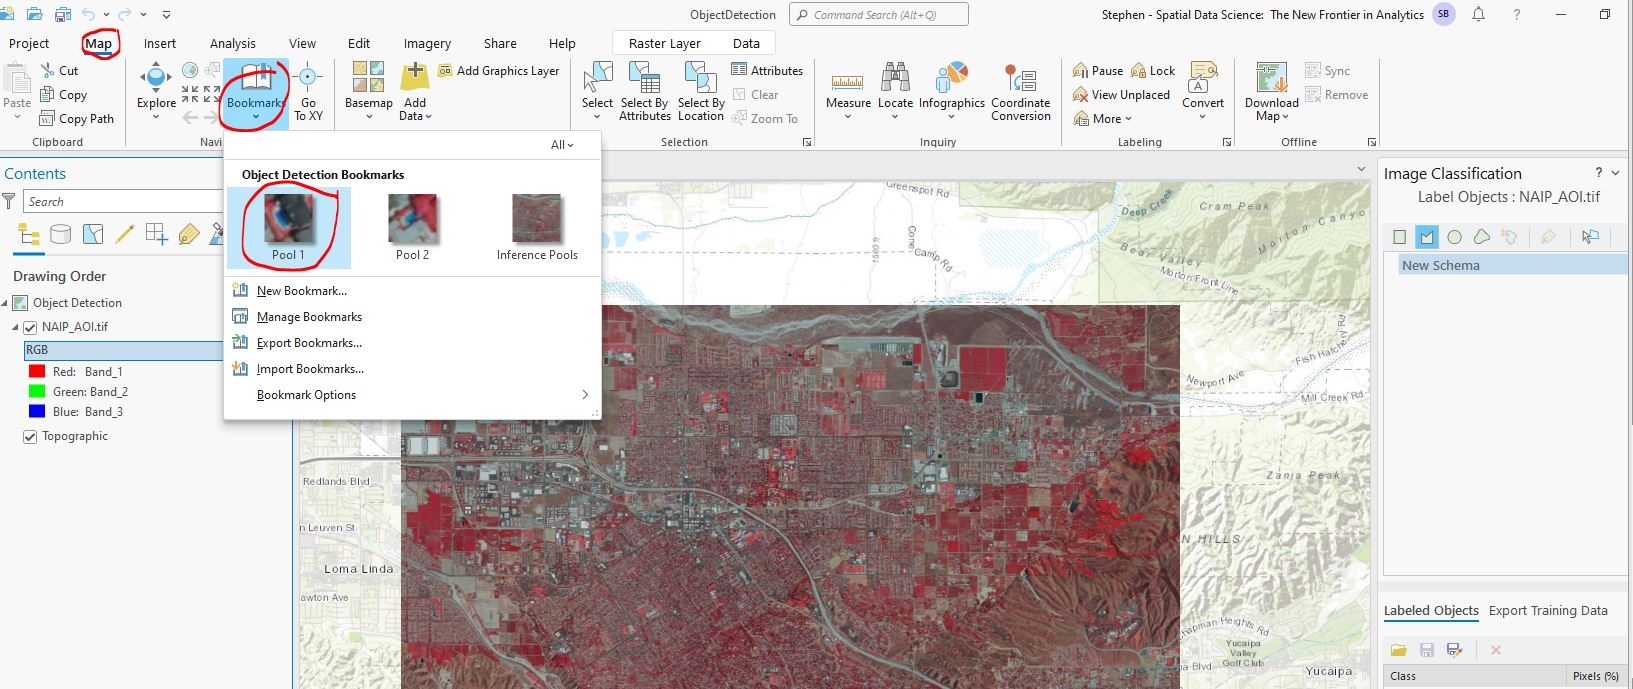

5. On the map, click the four corners of the pool to create a rectangular outline, and then double-click the last point of the rectangular outline to finish your polygon.

The Define Class dialog box appears. It allows you to define the class and value of the feature. Each class represents an object that you want to detect. If you wanted to detect pools and tennis courts, you would create two classes with training samples for each class.

6. In the Define Class dialog box, for Name, type Pool.

7. For Value, type 0.

>Note: All training samples must be labeled with a class value.

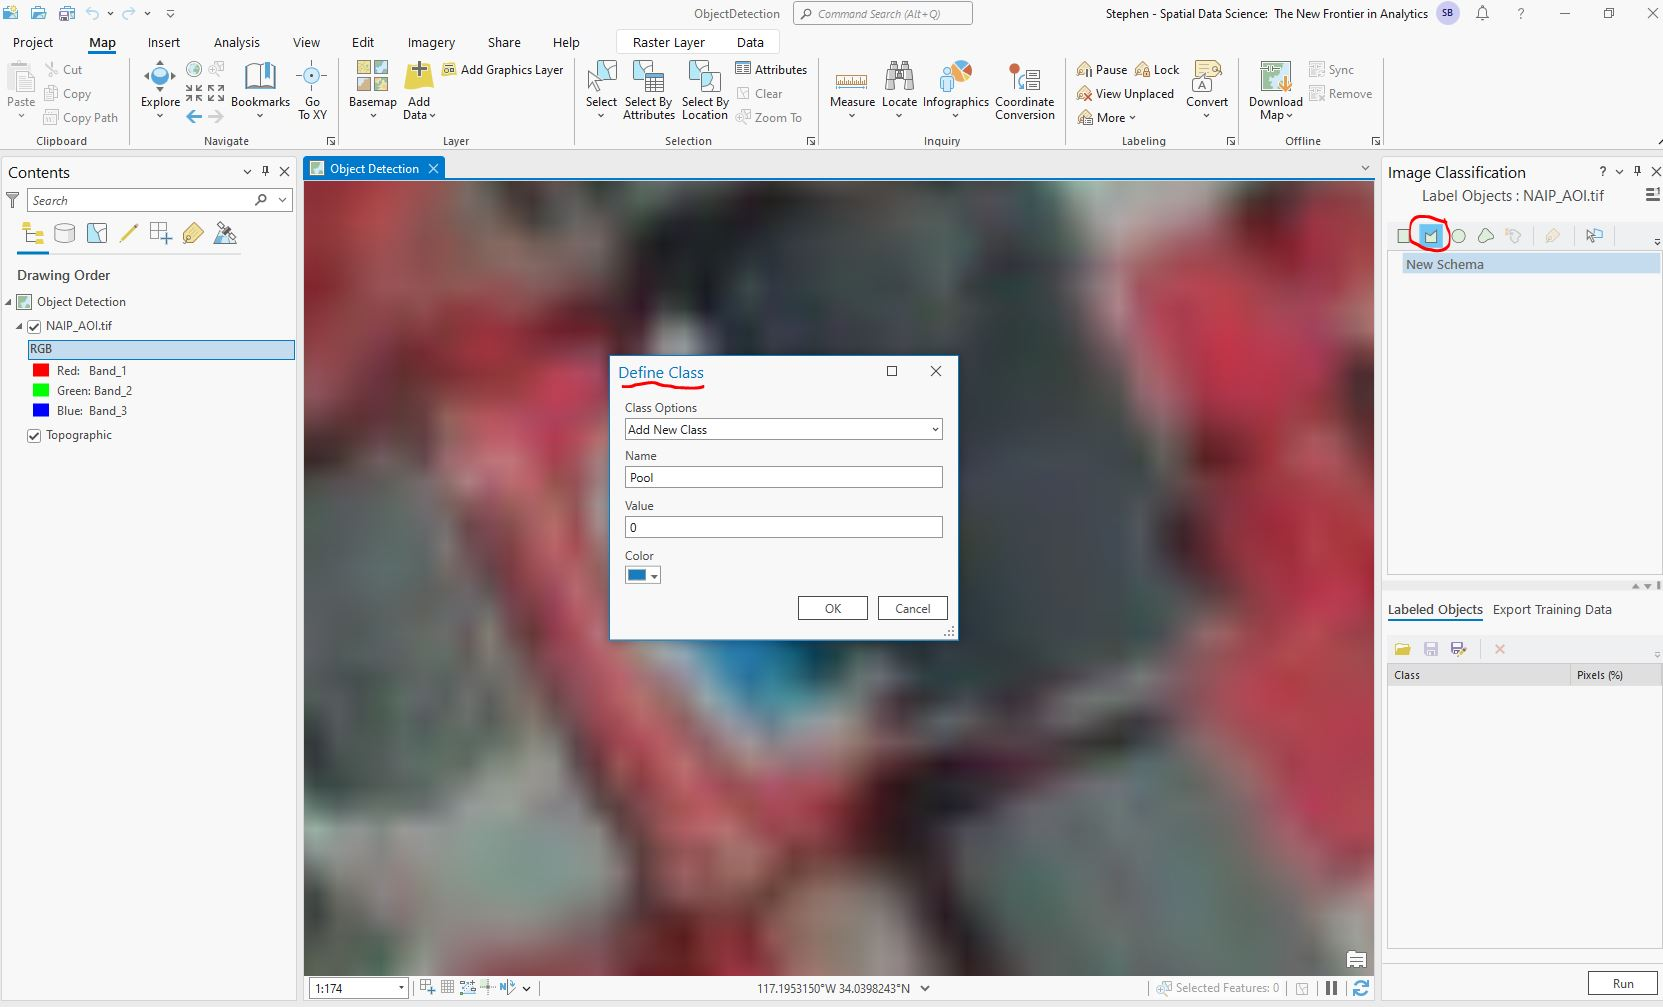

8. Click OK.

> Note: To delete a polygon that you created, select the polygon in the Image Classification pane under Labeled Objects, and then click the Delete button .

9. Zoom to the Pool 2 bookmark.

10. Use the Polygon tool to outline the pool.

>Note: The color and pixel percentage of your Pool polygons may differ.

In the Image Classification pane, under Labeled Objects, the next pool is automatically added and labeled as Pool.

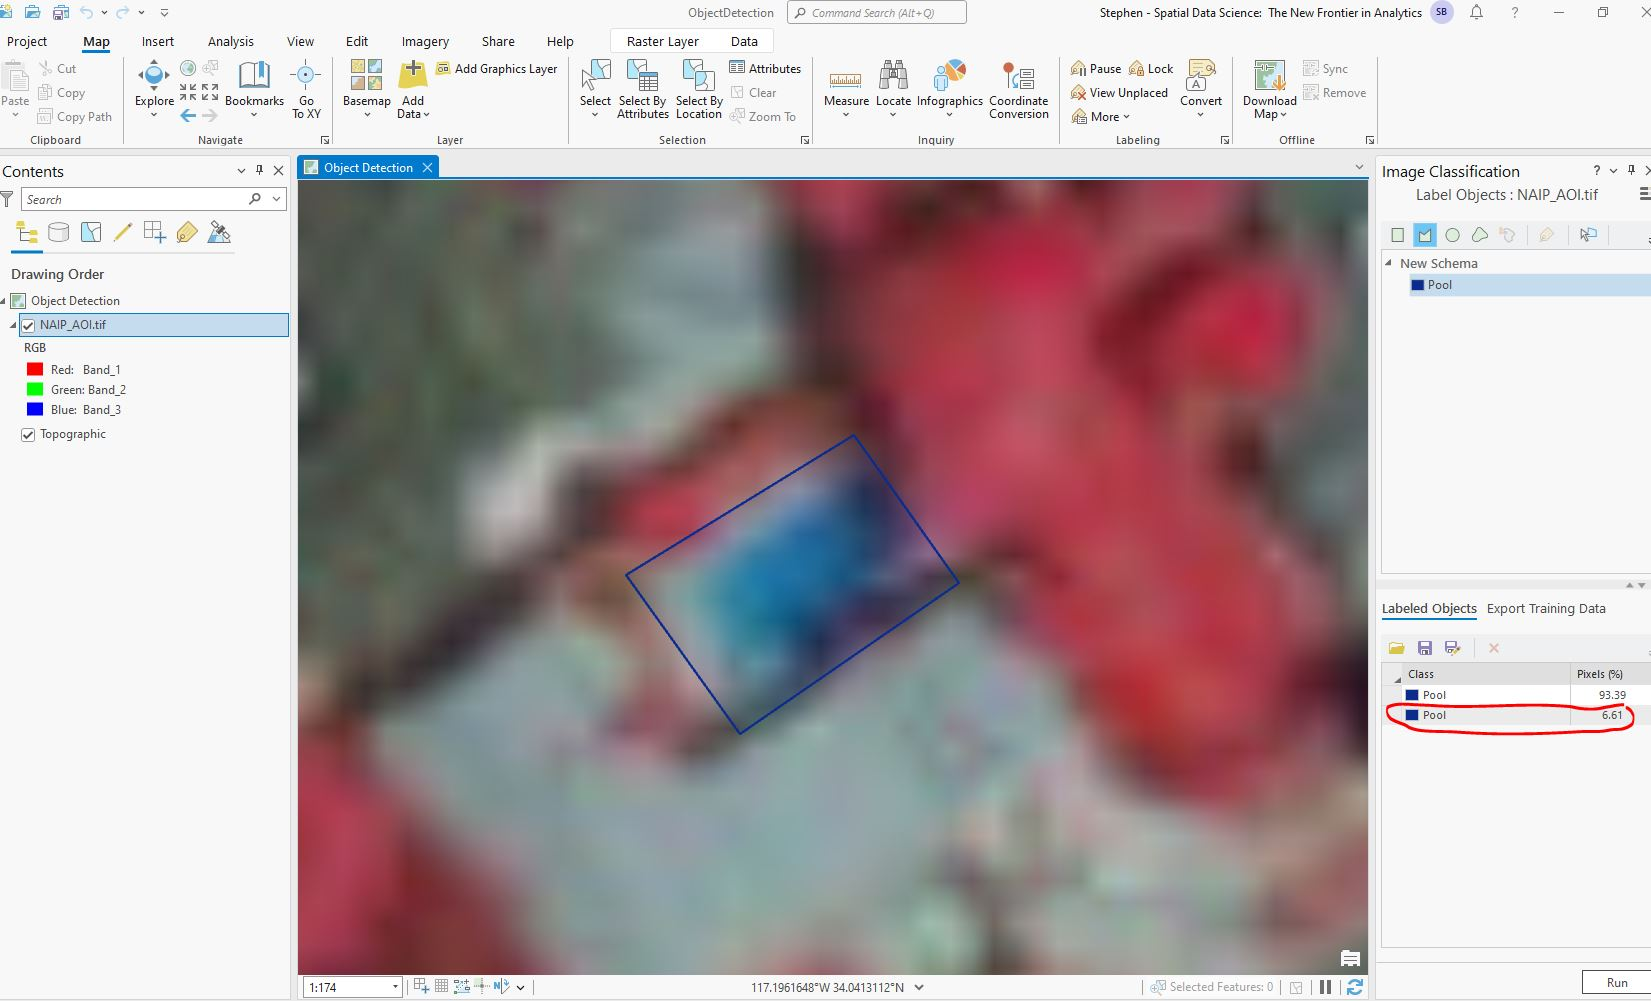

After creating your training samples, you would use the Image Classification pane's Export Training Data tab to export these training samples into a format that you can use to train your model. Because the creation of training samples can be a time-consuming process, you will proceed with a layer of pre-created training samples.

11. Close the Image Classification pane.

12. In the Label Objects warning window, click No.



### **Review training samples**

To save time, you will use preexisting data as training samples. You can use preexisting point, line, polygon, or even raster data for your training samples. In the previous step, you created polygons to represent the training samples (pools). In this step, you will use preexisting point data to represent the training samples (pools).

All training sample data must have a class value that distinguishes the types, or classes, of objects to detect. In this step, you will confirm that the pre-created point data includes this class value.

1. In the Catalog pane, expand Databases, and then expand ObjectDetection.gdb.

2. Right-click TrainingSamplesComplete and choose Add To Current Map.

3. In the Contents pane, right-click TrainingSamplesComplete and choose Zoom To Layer.

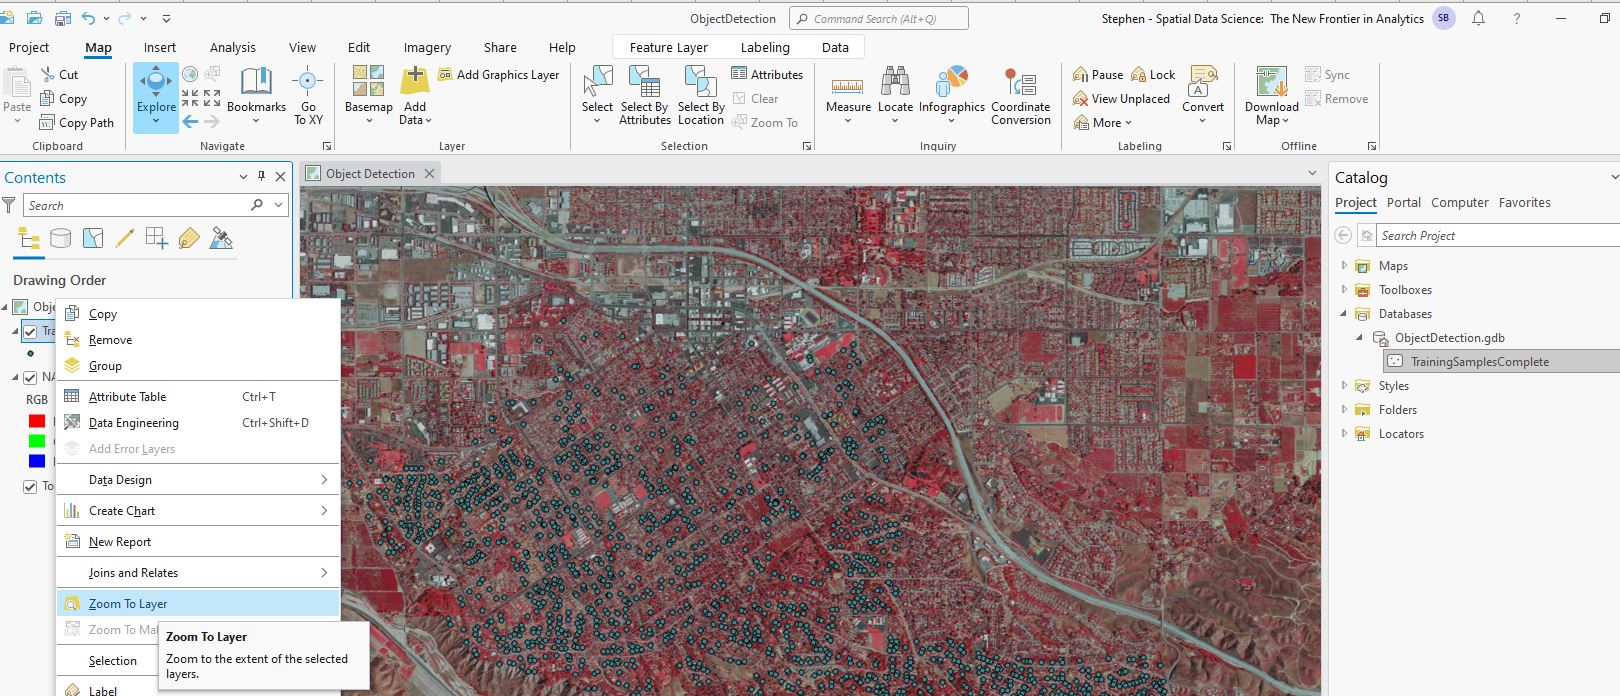

>Note: The points on your map may be a different color. If necessary, you can change the symbology color of the points.

This training samples data uses points to represent swimming pools.

4. Right-click TrainingSamplesComplete and choose Attribute Table.

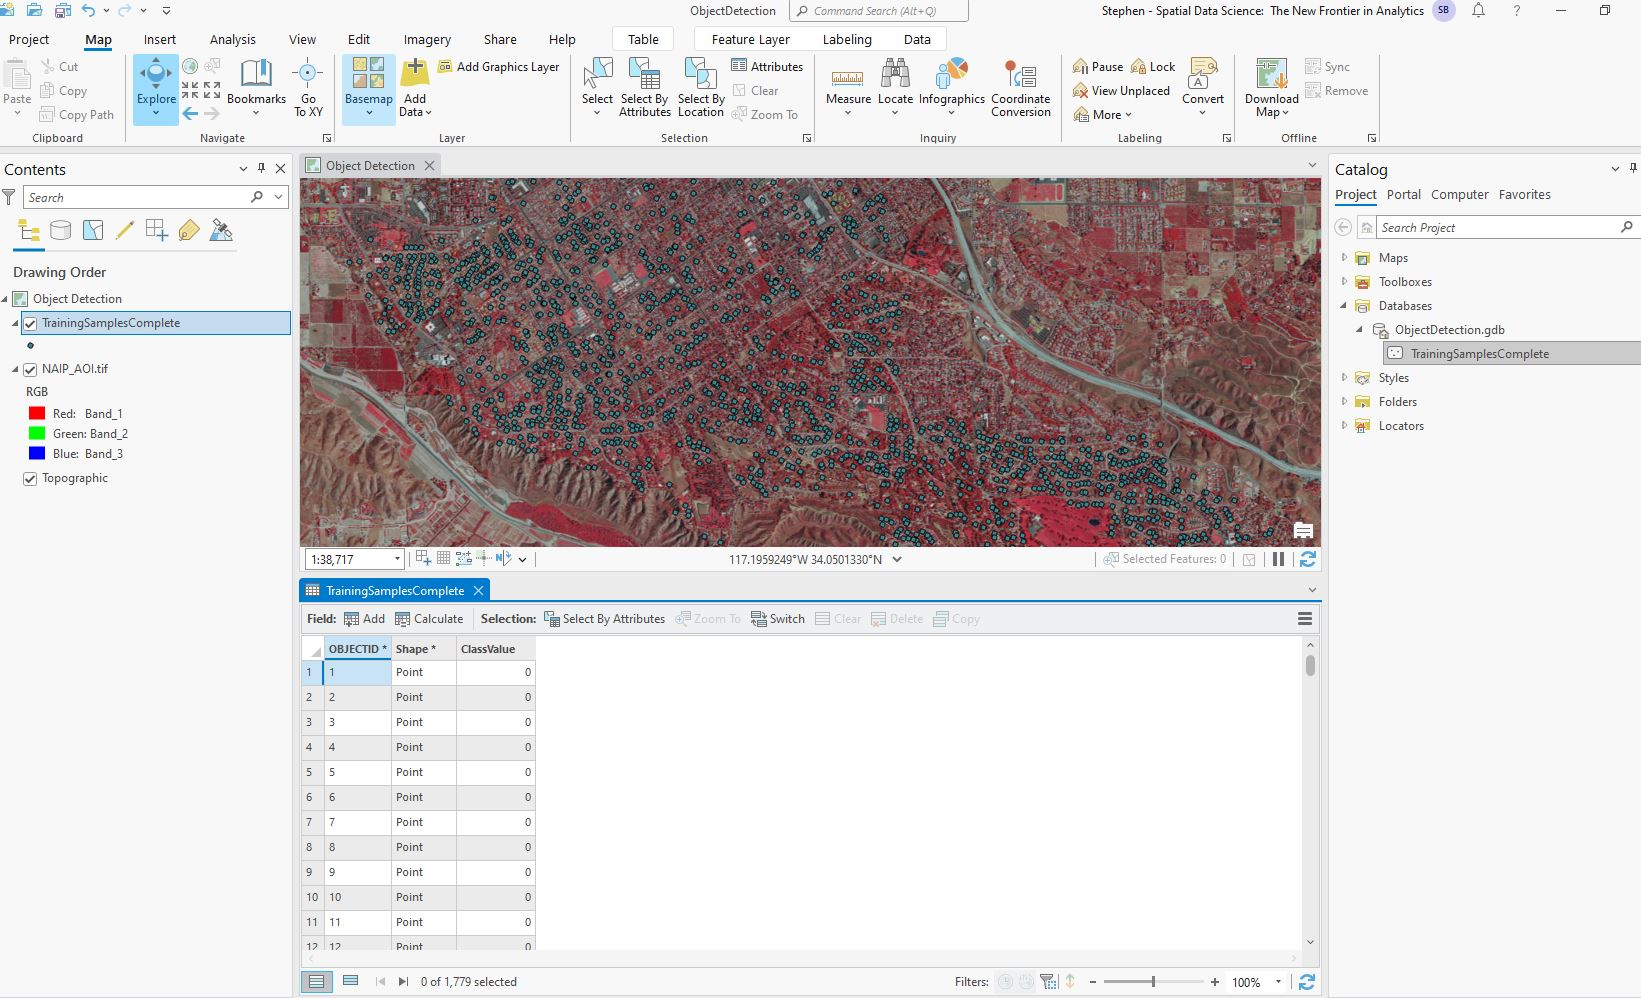

This analysis will detect one class: pools. As such, there is only one class value: 0.

5. Close the attribute table.

### **Export training samples**

In this step, you will export the pre-created training samples into image chips.

Image chips use the training sample locations to cut, or chip, the source imagery into defined sub-images that will contain a training sample. These image chips will be used to train the object detection deep learning model.

1. In the Geoprocessing pane, search for and open the `Export Training Data For Deep Learning (Image Analyst Tools)` tool.

You will use this tool to define the properties of the image chips.

2. Complete the tool by setting the following parameters:

- Input Raster: NAIP_AOI.tif
- Output Folder: ImageChips
- Input Feature Class Or Classified Raster Or Table: TrainingSamplesComplete
- Class Value Field: ClassValue
- Buffer Radius: 6

3. For Buffer Radius, point to the parameter name and pause over the geoprocessing input information icon ).


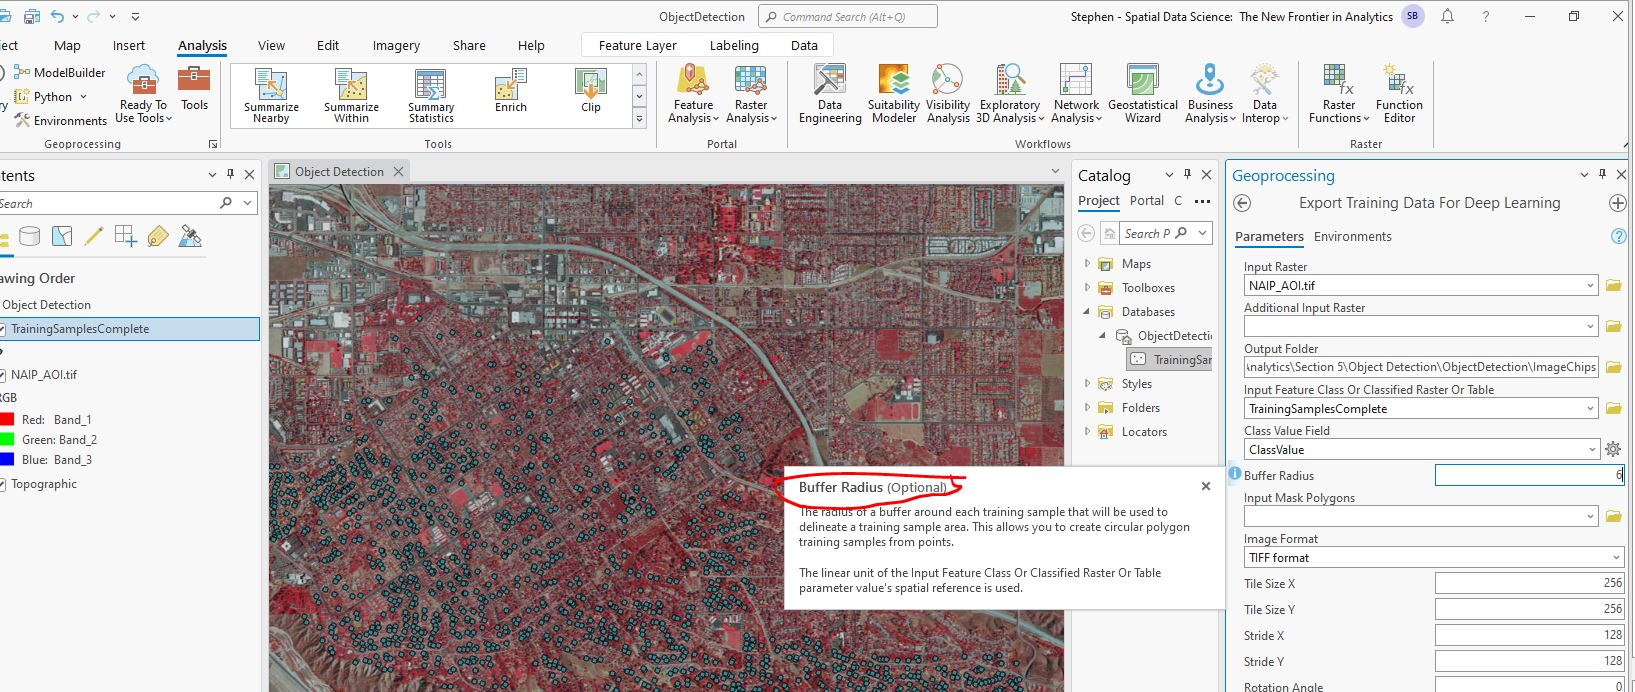

The geoprocessing input information icon provides an explanation of how the parameter is used in the tool. Because you are using point data, you can use this parameter to add a buffer around each point, creating circular polygon training samples that will better represent the shapes of the pools. The spatial reference of the input feature class (TrainingSamplesComplete) uses meters as its linear unit. Therefore, a Buffer Radius value of six meters will be appropriate for capturing the images of residential swimming pools. 

4. For Input Mask Polygons, leave this parameter empty.

This parameter delineates the area where image chips will be created. You want to create image chips for all training samples, so you will leave this parameter empty.

5. For Image Format, leave the default.

The image format that you choose will depend on the number of bands of your source imagery file.

6. For Tile Size X and Tile Size Y, leave the defaults.

The tile sizes are the dimensions of the image chip size in X and Y. The unit of measurement is in pixels. Larger tile sizes will require more processing time and power.

7. For Stride X and Stride Y, leave the defaults.

The stride setting determines how much overlap there will be in each image chip. With a tile size of 256 and a stride of 128, half of the first image chip will overlap with the next image chip. That is useful when you have a small training sample size and want to increase the training sample size.

8. For Rotation Angle, leave the default.

Rotation can be used to create additional image chips. The original chip is rotated by a specified angle to create additional chips at additional angles. This process can help augment the data.

>Note: There is no universally correct tile size, stride, and rotation angle. These values will vary based on your analysis, source imagery, and computing power. The default values provide a baseline, but it is recommended that you try several variations to determine whether your model results improve.

9. For Reference System, leave the default.

This parameter indicates the reference system that is used to interpret the input image. Because this image is pre-processed orthoimagery, it should be processed using Map Space.

10. For Output No Feature Tiles, leave the default.

This parameter allows you to include image chips that do not have any training samples. In this analysis, it would create image chips with no pools. These chips can provide more context to the model, identifying objects that may look like a pool but are not. Including false positives like these can potentially improve model results, but it includes additional image chips to process.

11. For Metadata Format, verify that PASCAL Visual Object Classes is selected.

This parameter defines the format for the image chip labels. The PASCAL Visual Object Classes format is a standardized image dataset format for object class detection.

12. For Minimum Polygon Overlap Ratio, leave the default.

This parameter sets the minimum overlap percentage for a feature to be included in the training data. The percentage value is expressed as a decimal for this parameter. The default value is 0, which means that all features will be included.

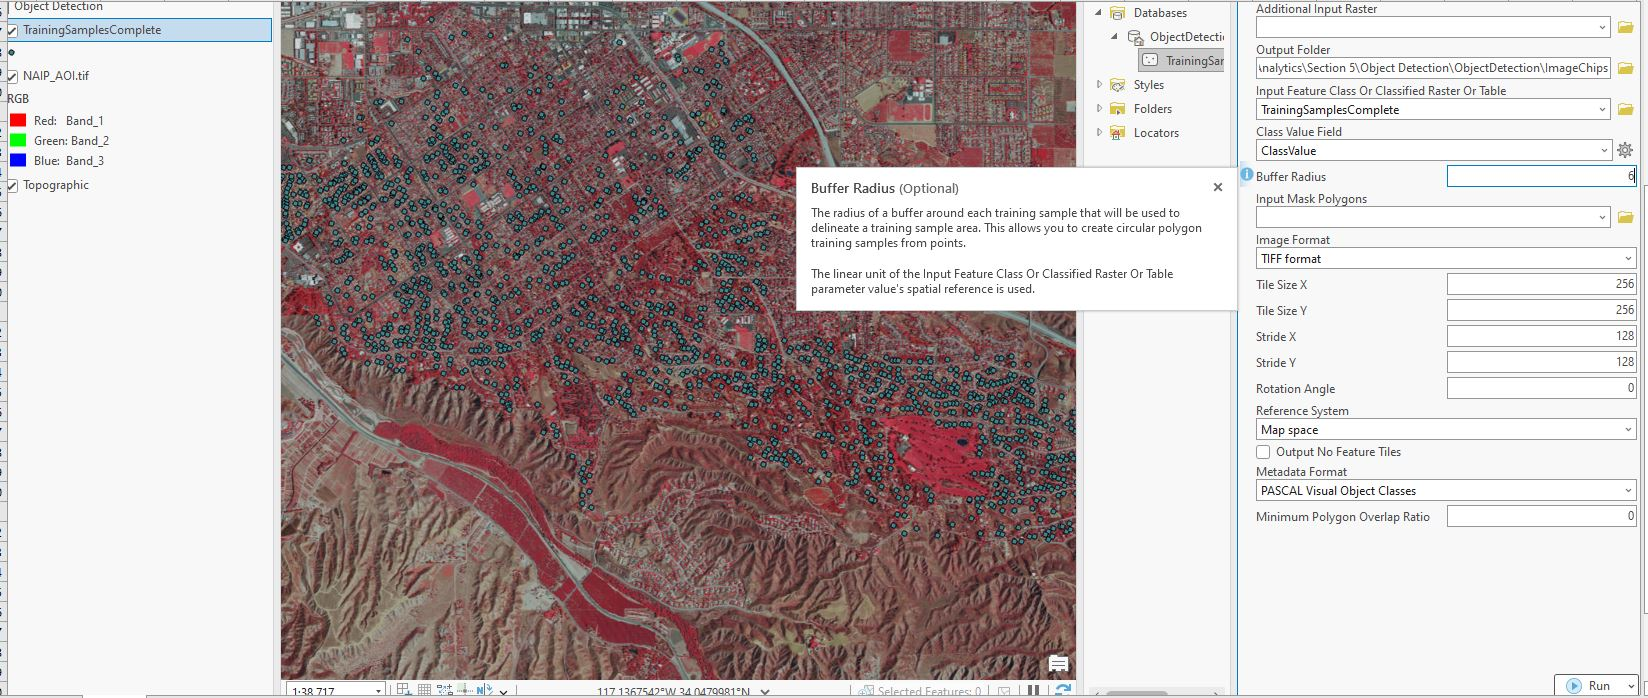

13. Click Run.

A message appears at the bottom of the Geoprocessing pane to confirm that the tool is complete.

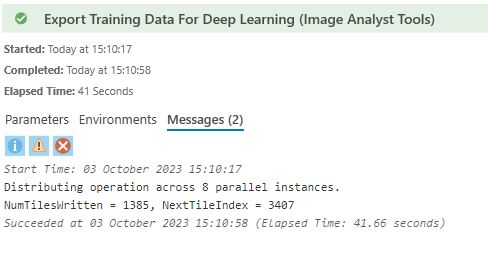


### **Review image chips**

After the Export Training Data For Deep Learning tool is complete, you can review the image chips from the specified folder location.

1. Open File Explorer.

2. Browse to ..\EsriTraining\ObjectDetection\ImageChips.


The tool creates a folder for the image chips that includes the images, label definitions for the images, image statistics, and a model definition file. The model definition file references this image chip information. You will use the model definition file to train the model.

3. Double-click the Images folder.

4. Open one of the TIF files.

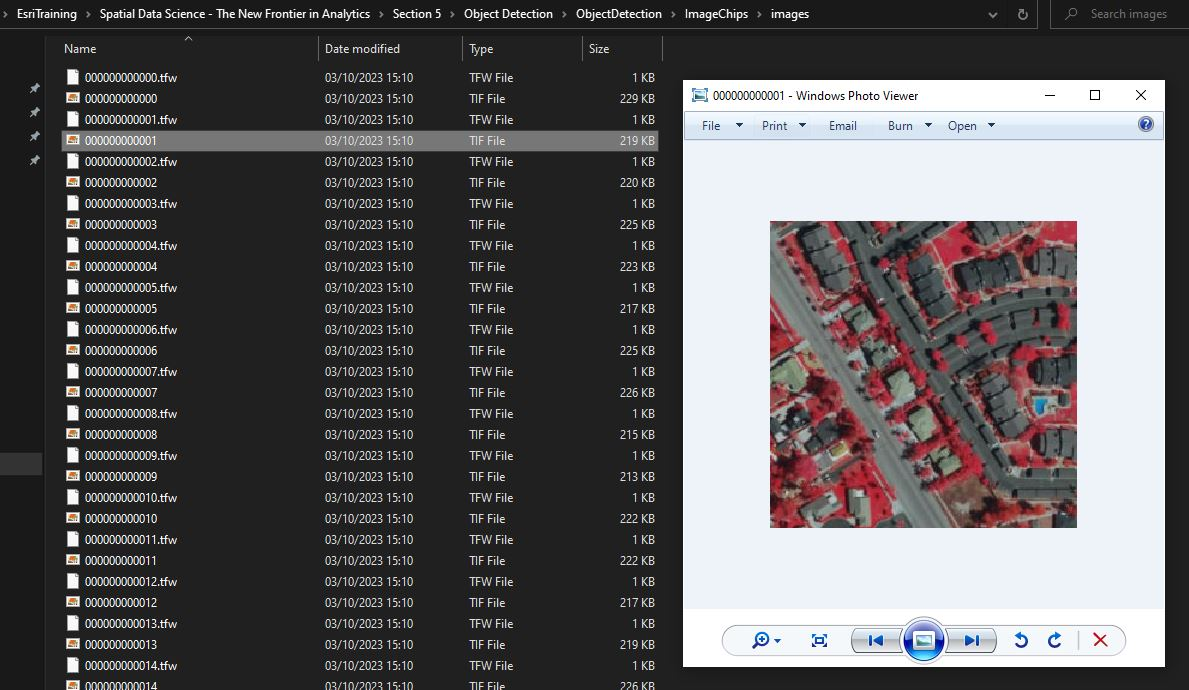

This image chip is an example of one of the image chips that will be used to train the model to detect swimming pools in the defined area.

5. Close the image and File Explorer.

6. Return to ArcGIS Pro and save the project.

7. If you are continuing to the next exercise, leave ArcGIS Pro open; otherwise, exit ArcGIS Pro.